# 1.4 Data Cleaning and Preparation

During the course of doing data analysis and modeling, 
a significant amount of time is spent on data preparation: 
*    loading, 
*    cleaning, 
*    transforming, and 
*    rearranging. 

Such tasks are often reported to take up 80% or more of an analyst’s time. 
Sometimes the way that data is stored in files or databases is not in the 
right format for a particular task. 
Many researchers choose to do ad hoc processing of data from one form to another 
using a general-purpose programming language, like `Python`, `Perl`, `R`, or `Java`, or 
Unix text-processing tools like `sed` or `aw`k. 

Fortunately, `pandas,` along with the built-in Python language features, provides you with 
a high-level, flexible, and fast set of tools to enable you to manipulate data into the right form.


In this section, we shall discuss tools for 
*   missing data, 
*   duplicate data, 
*   string manipulation, and 
*   some other analytical data transformations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# np.random.seed(103)

## 1.4.1 Handling Missing Data

*  Missing data occurs commonly in many data analysis applications.

*  For data with `float64` dtype, `pandas` uses the floating-point value `NaN` (Not a Number) to represent missing data.

    *  We call this a `sentinel value`. When present, it indicates a missing (or null) value.

In [2]:
float_data01 = pd.Series([1.2, -3.5, np.nan, 0])
float_data01

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [3]:
float_data01.isna()

0    False
1    False
2     True
3    False
dtype: bool

*   We refer to missing data as `NA`, which stands for *not available*.

*   In statistics applications, `NA` data may either be data 

    *   that does not exist or 

    *   that exists but was not observed.

* The built-in Python `None` value is also treated as `NA`.

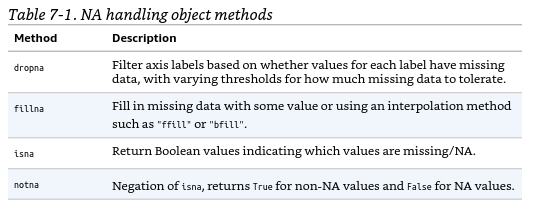

In [4]:
from IPython import display
display.Image("../Images/Module_1.4/table_7-1.png", width = 500)

In [5]:
string_data01 = pd.Series(["aardvark", np.nan, None, "avocado"])
string_data01

0    aardvark
1         NaN
2        None
3     avocado
dtype: object

In [6]:
string_data01.isna()

0    False
1     True
2     True
3    False
dtype: bool

In [7]:
float_data02 = pd.Series([1, 2, None], dtype='float64')
float_data02

0    1.0
1    2.0
2    NaN
dtype: float64

In [8]:
float_data02.isna()

0    False
1    False
2     True
dtype: bool

In [9]:
data01 = pd.Series([1, np.nan, 3.5, np.nan, 7])
data01.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [10]:
data01[data01.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [11]:
data02 = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
                     [np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
data02

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
data02.dropna()

,0,1,2
0,1.0,6.5,3.0


In [13]:
data02.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data02

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data03 = data02.copy(deep=True)
data03[4] = np.nan
data03

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data02

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
# To drop columns: pass axis="columns":
data03.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


> Suppose you want to keep only rows containing at most a certain number of missing observations. 

> You can indicate this with the `thresh` argument:

In [18]:
np.random.seed(103)
df01 = pd.DataFrame(np.random.standard_normal((7, 3)))
df01.iloc[:4, 1] = np.nan
df01.iloc[:2, 2] = np.nan
df01

,0,1,2
0,-1.249278,NaN,NaN
1,-0.385461,NaN,NaN
2,0.430793,NaN,-0.980011
3,-0.631965,NaN,-0.124758
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


In [19]:
df01.dropna()

,0,1,2
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


In [20]:
df01.dropna(thresh=2)

,0,1,2
2,0.430793,NaN,-0.980011
3,-0.631965,NaN,-0.124758
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


#### Filling In Missing Data

In [21]:
df01

,0,1,2
0,-1.249278,NaN,NaN
1,-0.385461,NaN,NaN
2,0.430793,NaN,-0.980011
3,-0.631965,NaN,-0.124758
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


In [22]:
#  Calling `fillna` with a `constant` replaces missing values with that value.
df01.fillna(0)

,0,1,2
0,-1.249278,0.000000,0.000000
1,-0.385461,0.000000,0.000000
2,0.430793,0.000000,-0.980011
3,-0.631965,0.000000,-0.124758
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


In [23]:
#  Calling `fillna` with a dictionary
df01.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.249278,0.500000,0.000000
1,-0.385461,0.500000,0.000000
2,0.430793,0.500000,-0.980011
3,-0.631965,0.500000,-0.124758
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853
6,0.680286,1.329175,1.283450


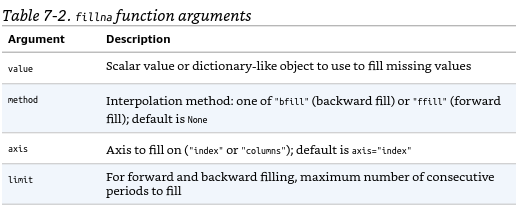

In [24]:
from IPython import display
display.Image("../Images/Module_1.4/table_7-2.png", width = 500)

In [25]:
np.random.seed(103)
df02 = pd.DataFrame(np.random.standard_normal((6, 3)))
df02.iloc[2:, 1] = np.nan
df02.iloc[4:, 2] = np.nan
df02

,0,1,2
0,-1.249278,-0.260331,0.383793
1,-0.385461,-1.085137,2.327219
2,0.430793,NaN,-0.980011
3,-0.631965,NaN,-0.124758
4,0.978948,NaN,NaN
5,-1.376369,NaN,NaN


In [26]:
df02.fillna(method="ffill")

,0,1,2
0,-1.249278,-0.260331,0.383793
1,-0.385461,-1.085137,2.327219
2,0.430793,-1.085137,-0.980011
3,-0.631965,-1.085137,-0.124758
4,0.978948,-1.085137,-0.124758
5,-1.376369,-1.085137,-0.124758


In [27]:
df02.fillna(method="ffill", limit=2)

,0,1,2
0,-1.249278,-0.260331,0.383793
1,-0.385461,-1.085137,2.327219
2,0.430793,-1.085137,-0.980011
3,-0.631965,-1.085137,-0.124758
4,0.978948,NaN,-0.124758
5,-1.376369,NaN,-0.124758


In [28]:
np.random.seed(103)
df03 = pd.DataFrame(np.random.standard_normal((6, 3)))
df03.iloc[:2, 1] = np.nan
df03.iloc[:4, 2] = np.nan
df03

,0,1,2
0,-1.249278,NaN,NaN
1,-0.385461,NaN,NaN
2,0.430793,0.432316,NaN
3,-0.631965,0.577442,NaN
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853


In [29]:
df03.fillna(method="bfill")

,0,1,2
0,-1.249278,0.432316,-1.201945
1,-0.385461,0.432316,-1.201945
2,0.430793,0.432316,-1.201945
3,-0.631965,0.577442,-1.201945
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853


In [30]:
df03.fillna(method="bfill", limit=3)

,0,1,2
0,-1.249278,0.432316,NaN
1,-0.385461,0.432316,-1.201945
2,0.430793,0.432316,-1.201945
3,-0.631965,0.577442,-1.201945
4,0.978948,1.594922,-1.201945
5,-1.376369,1.054346,-0.038853


In [31]:
data04 = pd.Series([1., np.nan, 3.5, np.nan, 7])
data04

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [32]:
data04

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [33]:
data04.mean()

3.8333333333333335

In [34]:
data04.fillna(data04.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 1.4.2 Data Transformation

#### Removing Duplicates

In [35]:
data05 = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})
data05

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [36]:
data05.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [37]:
data05.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [38]:
data06 = data05.copy(deep=True)
data06

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [39]:
data06["v1"] = range(7)
data06

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [40]:
data06.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


> `duplicated` and `drop_duplicates` by default keep the first observed value combination. 

> Passing `keep="last"` will return the last one.

In [41]:
data06

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [42]:
data06.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


#### Transforming Data Using a Function or Mapping

In [43]:
data07 = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                              "pastrami", "corned beef", "bacon",
                              "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data07

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [44]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

In [45]:
type(meat_to_animal)

dict

In [46]:
meat_to_animal

{'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'}

In [47]:
data08 = data07.copy(deep=True)
data08

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [48]:
# transforming data with a dictionary
data08["animal"] = data08["food"].map(meat_to_animal)
data08

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [49]:
# transforming data with a function
def get_animal(x):
    return meat_to_animal[x]

data09 = data07.copy(deep=True)
data09["animal"] = data09["food"].map(get_animal)
data09

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### Replacing Values

*   Filling in missing data with the `fillna` method is a special case of more general value replacement. 

*   `map` can be used to modify a subset of values in an object. 
    
*   `replace` provides a simpler and more flexible way to do so. 

In [50]:
data10 = pd.Series([1., -999., 2., -999., -1000., 3.])
data10

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [51]:
# replacing a particular value
data10.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [52]:
# replacing two or more values with a value
data10.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [53]:
# replacing two or more values with a corresponding number of values
data10.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [54]:
data10

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [55]:
# replacing values using a dictionary
x = {-999: np.nan, -1000: 0}
data10.replace(x)

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

#### Renaming axis Indices

In [56]:
data11 = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["ohio", "colorado", "new york"],
                    columns=["one", "two", "three", "four"])
data11

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [57]:
def transform(x):
    return x[:4].upper()

data11.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [58]:
data12 = data11.copy(deep=True)
data12.index = data12.index.map(transform)
data12

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [59]:
data11

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
new york,8,9,10,11


In [60]:
data13 = data11.copy(deep=True)
data13 = data13.rename(index=str.title, columns=str.upper)
data13

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [61]:
data13.rename(index={"Ohio": "Indiana"},
            columns={"THREE": "PEEKABOO"})

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


#### Discretization and Binning

* Continuous data is often discretized or otherwise separated into “bins” for analysis.
                                                                         
* [pandas.cut — pandas 2.1.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)                                                             

In [62]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [63]:
# Dividing these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older 
# by using the `pandas.cut`.
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [64]:
# default: include_lowest=False
xages = [20, 25, 30, 35, 40]
xbins = [20, 25, 40]
pd.cut(xages, xbins)

[NaN, (20.0, 25.0], (25.0, 40.0], (25.0, 40.0], (25.0, 40.0]]
Categories (2, interval[int64, right]): [(20, 25] < (25, 40]]

In [65]:
# default: include_lowest=False
xages = [20, 25, 30, 35, 40]
xbins = [20, 25, 40]
pd.cut(xages, xbins, include_lowest=True)

[(19.999, 25.0], (19.999, 25.0], (25.0, 40.0], (25.0, 40.0], (25.0, 40.0]]
Categories (2, interval[float64, right]): [(19.999, 25.0] < (25.0, 40.0]]

In [66]:
# default: include_lowest=False
xages = [20, 25, 30, 35, 40]
xbins = [20, 25, 40]
pd.cut(xages, xbins, right=False, include_lowest=True)

[[20.0, 25.0), [25.0, 40.0), [25.0, 40.0), [25.0, 40.0), NaN]
Categories (2, interval[int64, left]): [[20, 25) < [25, 40)]

In [67]:
# default: include_lowest=False
xages = [20, 25, 30, 35, 40]
xbins = [20, 25, 40]
pd.cut(xages, xbins, right=True, include_lowest=True)

[(19.999, 25.0], (19.999, 25.0], (25.0, 40.0], (25.0, 40.0], (25.0, 40.0]]
Categories (2, interval[float64, right]): [(19.999, 25.0] < (25.0, 40.0]]

In [68]:
Age = pd.Series(ages)
Age

0     20
1     22
2     25
3     27
4     21
5     23
6     37
7     31
8     61
9     45
10    41
11    32
dtype: int64

In [69]:
Category = pd.Series(age_categories)
Category

0      (18, 25]
1      (18, 25]
2      (18, 25]
3      (25, 35]
4      (18, 25]
5      (18, 25]
6      (35, 60]
7      (25, 35]
8     (60, 100]
9      (35, 60]
10     (35, 60]
11     (25, 35]
dtype: category
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [70]:
data14 = pd.DataFrame({"Age": Age, "Category": Category})
data14

,Age,Category
0,20,"(18, 25]"
1,22,"(18, 25]"
2,25,"(18, 25]"
3,27,"(25, 35]"
4,21,"(18, 25]"
5,23,"(18, 25]"
6,37,"(35, 60]"
7,31,"(25, 35]"
8,61,"(60, 100]"
9,45,"(35, 60]"


In [71]:
data14["Code"] = pd.Series(age_categories.codes)
data14

,Age,Category,Code
0,20,"(18, 25]",0
1,22,"(18, 25]",0
2,25,"(18, 25]",0
3,27,"(25, 35]",1
4,21,"(18, 25]",0
5,23,"(18, 25]",0
6,37,"(35, 60]",2
7,31,"(25, 35]",1
8,61,"(60, 100]",3
9,45,"(35, 60]",2


In [72]:
# Overriding the default interval-based bin labeling by passing a list or array to the `labels` option. 
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
GroupName = pd.Series(pd.cut(ages, bins, labels=group_names))
GroupName

0          Youth
1          Youth
2          Youth
3     YoungAdult
4          Youth
5          Youth
6     MiddleAged
7     YoungAdult
8         Senior
9     MiddleAged
10    MiddleAged
11    YoungAdult
dtype: category
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [73]:
data14["GroupName"] = GroupName
data14

,Age,Category,Code,GroupName
0,20,"(18, 25]",0,Youth
1,22,"(18, 25]",0,Youth
2,25,"(18, 25]",0,Youth
3,27,"(25, 35]",1,YoungAdult
4,21,"(18, 25]",0,Youth
5,23,"(18, 25]",0,Youth
6,37,"(35, 60]",2,MiddleAged
7,31,"(25, 35]",1,YoungAdult
8,61,"(60, 100]",3,Senior
9,45,"(35, 60]",2,MiddleAged


In [74]:
data15 = data14.copy(deep=True)
data15

,Age,Category,Code,GroupName
0,20,"(18, 25]",0,Youth
1,22,"(18, 25]",0,Youth
2,25,"(18, 25]",0,Youth
3,27,"(25, 35]",1,YoungAdult
4,21,"(18, 25]",0,Youth
5,23,"(18, 25]",0,Youth
6,37,"(35, 60]",2,MiddleAged
7,31,"(25, 35]",1,YoungAdult
8,61,"(60, 100]",3,Senior
9,45,"(35, 60]",2,MiddleAged


In [75]:
#pd.value_counts(pd.cut(ages, bins, labels=group_names))
data15[["Category", "Code", "GroupName"]].value_counts()

Category   Code  GroupName 
(18, 25]   0     Youth         5
(25, 35]   1     YoungAdult    3
(35, 60]   2     MiddleAged    3
(60, 100]  3     Senior        1
Name: count, dtype: int64

In [76]:
data15.iloc[:, 1:]

,Category,Code,GroupName
0,"(18, 25]",0,Youth
1,"(18, 25]",0,Youth
2,"(18, 25]",0,Youth
3,"(25, 35]",1,YoungAdult
4,"(18, 25]",0,Youth
5,"(18, 25]",0,Youth
6,"(35, 60]",2,MiddleAged
7,"(25, 35]",1,YoungAdult
8,"(60, 100]",3,Senior
9,"(35, 60]",2,MiddleAged


In [77]:
data14.loc[:, "Category":"GroupName"]

,Category,Code,GroupName
0,"(18, 25]",0,Youth
1,"(18, 25]",0,Youth
2,"(18, 25]",0,Youth
3,"(25, 35]",1,YoungAdult
4,"(18, 25]",0,Youth
5,"(18, 25]",0,Youth
6,"(35, 60]",2,MiddleAged
7,"(25, 35]",1,YoungAdult
8,"(60, 100]",3,Senior
9,"(35, 60]",2,MiddleAged


In [78]:
data15.iloc[:,1:].value_counts()

Category   Code  GroupName 
(18, 25]   0     Youth         5
(25, 35]   1     YoungAdult    3
(35, 60]   2     MiddleAged    3
(60, 100]  3     Senior        1
Name: count, dtype: int64

In [79]:
# Passing an integer number of bins to `pandas.cut` instead of explicit bin edges
# will compute equal-length bins based on the minimum and maximum values in the data. 

np.random.seed(103)
value = pd.Series(np.random.uniform(size=20))
category = pd.cut(value, 4, precision=2)
data16 = pd.DataFrame(data = {"Value" : value, "Category" : category})
data16

,Value,Category
0,0.432111,"(0.24, 0.48]"
1,0.174215,"(0.007, 0.24]"
2,0.170944,"(0.007, 0.24]"
3,0.827632,"(0.71, 0.95]"
4,0.587171,"(0.48, 0.71]"
5,0.459354,"(0.24, 0.48]"
6,0.822685,"(0.71, 0.95]"
7,0.821548,"(0.71, 0.95]"
8,0.307120,"(0.24, 0.48]"
9,0.200894,"(0.007, 0.24]"


In [80]:
category.value_counts()

(0.24, 0.48]     6
(0.48, 0.71]     5
(0.71, 0.95]     5
(0.007, 0.24]    4
Name: count, dtype: int64

In [81]:
#  
np.random.seed(103)
data17 = np.random.standard_normal(1000000)
quantiles = pd.Series(pd.qcut(data17, 5, precision=2))
data17[:5]

array([-1.24927835, -0.26033141,  0.3837933 , -0.38546147, -1.08513673])

In [82]:
quantiles.describe()

count            1000000
unique                 5
top       (-5.16, -0.84]
freq              200000
dtype: object

In [83]:
quantiles.value_counts()

(-5.16, -0.84]    200000
(-0.84, -0.25]    200000
(-0.25, 0.25]     200000
(0.25, 0.84]      200000
(0.84, 4.96]      200000
Name: count, dtype: int64

In [84]:
pd.value_counts(quantiles)

(-5.16, -0.84]    200000
(-0.84, -0.25]    200000
(-0.25, 0.25]     200000
(0.25, 0.84]      200000
(0.84, 4.96]      200000
Name: count, dtype: int64

In [85]:
pd.qcut(data17, [0, 0.1, 0.4, 0.6, 0.9, 1.]).value_counts()

(-5.1530000000000005, -1.282]    100000
(-1.282, -0.254]                 300000
(-0.254, 0.252]                  200000
(0.252, 1.28]                    300000
(1.28, 4.957]                    100000
Name: count, dtype: int64

#### Detecting and Filtering Outliers

In [91]:
np.random.seed(103)
data18 = pd.DataFrame(np.random.standard_normal((1000, 4)))
data18.shape

(1000, 4)

In [93]:
data18.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000412,-0.012242,-0.010730,0.067477
std,1.021920,1.031828,1.013947,0.974781
min,-3.498221,-3.233028,-3.176829,-2.989997
25%,-0.656129,-0.674704,-0.703002,-0.562594
50%,0.007172,-0.026046,0.025983,0.067660
75%,0.669728,0.653509,0.684713,0.688818
max,3.351353,3.389309,3.105395,3.560103


In [94]:
# Finding min or max in 3rd column
col = data18[2]
col[col.abs() > 3]

27     3.105395
47    -3.176829
396    3.015560
708   -3.015897
963   -3.000181
Name: 2, dtype: float64

In [95]:
data18[(data18.abs() > 3).any(axis="columns")]

,0,1,2,3
27,1.372364,0.331214,3.105395,-0.567615
47,-0.177101,0.007524,-3.176829,-0.465000
70,-3.137890,-0.483913,0.947882,-1.514476
279,1.789418,3.144755,-1.054775,-2.008197
307,-3.498221,-0.856311,0.775260,1.458302
343,1.075123,3.238597,1.002548,-0.693203
351,3.351353,1.388420,0.197157,2.182352
396,-0.509478,-1.184234,3.015560,-1.536387
669,-0.398582,3.389309,-0.582256,0.006831
708,0.117313,0.090730,-3.015897,0.705014


In [96]:
data19 = data18.copy(deep=True)
data19[data19.abs() > 3] = np.sign(data19) * 3
data19.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001281,-0.012804,-0.010658,0.066917
std,1.017011,1.028688,1.012996,0.972932
min,-3.000000,-3.000000,-3.000000,-2.989997
25%,-0.656129,-0.674704,-0.703002,-0.562594
50%,0.007172,-0.026046,0.025983,0.067660
75%,0.669728,0.653509,0.684713,0.688818
max,3.000000,3.000000,3.000000,3.000000


In [97]:
data18.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000412,-0.012242,-0.010730,0.067477
std,1.021920,1.031828,1.013947,0.974781
min,-3.498221,-3.233028,-3.176829,-2.989997
25%,-0.656129,-0.674704,-0.703002,-0.562594
50%,0.007172,-0.026046,0.025983,0.067660
75%,0.669728,0.653509,0.684713,0.688818
max,3.351353,3.389309,3.105395,3.560103


In [99]:
data19.head()

,0,1,2,3
0,-1.249278,-0.260331,0.383793,-0.385461
1,-1.085137,2.327219,0.430793,0.432316
2,-0.980011,-0.631965,0.577442,-0.124758
3,0.978948,1.594922,-1.201945,-1.376369
4,1.054346,-0.038853,0.680286,1.329175


In [100]:
np.sign(data19).head()

,0,1,2,3
0,-1.0,-1.0,1.0,-1.0
1,-1.0,1.0,1.0,1.0
2,-1.0,-1.0,1.0,-1.0
3,1.0,1.0,-1.0,-1.0
4,1.0,-1.0,1.0,1.0


#### Permutation and Random Sampling

In [107]:
df01 = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df01

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [108]:
np.random.seed(103)
sampler01 = np.random.permutation(5)
sampler01

array([2, 0, 4, 3, 1])

##### Using the `take` function for indexing with `sampler01`

In [106]:
df01.take(sampler01)

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


##### Using the `iloc`-based indexing with `sampler01`

In [109]:
df01.iloc[sampler01]

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27
1,7,8,9,10,11,12,13


##### Permutation of the columns

In [111]:
column_sampler01 = np.random.permutation(7)
column_sampler01

array([0, 3, 1, 6, 2, 5, 4])

In [112]:
df01.take(column_sampler01, axis="columns")

,0,3,1,6,2,5,4
0,0,3,1,6,2,5,4
1,7,10,8,13,9,12,11
2,14,17,15,20,16,19,18
3,21,24,22,27,23,26,25
4,28,31,29,34,30,33,32


##### Selecting a random subset without replacement with the `sample` method on `Series` and `DataFrame`

```
DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
```

In [113]:
df01

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [120]:
np.random.seed(12345)
df01.sample(n=3)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27


In [123]:
np.random.seed(12345)
df01.sample(n=3, axis=0)

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
3,21,22,23,24,25,26,27


In [125]:
np.random.seed(123456789)
df01.sample(n=2, axis=1)

,6,3
0,6,3
1,13,10
2,20,17
3,27,24
4,34,31


In [128]:
np.random.seed(123456789)
df01.sample(n=5, axis=1, replace=True)

,0,4,2,1,2
0,0,4,2,1,2
1,7,11,9,8,9
2,14,18,16,15,16
3,21,25,23,22,23
4,28,32,30,29,30


## 1.4.3  String Manipulation

## 1.4.4 Categorical Data 